## Personalized location recommendation and search 
Name: Omar Sharif

Website: https://omarsharif786.github.io/

### Overview 
Location based cloud services contains data of users who visits places which can be used to design recommendation systems. With sufficient amount of data the system can provide suggestions and categorize places with substantial ratings. The cloud services company Foursquare provided a dataset containing digital footprint of users that includes check-ins, tips and tag data of New York resaurants. 

### Data Source 

https://sites.google.com/site/yangdingqi/home/foursquare-dataset

### Project Goal 
Use data analysis and machine learning techniques to represent the data in a meaningful way and perform prediction of recommention for new users. 


### Project Plan
Step 1: Explore the  data and it's attributes  
Step 2: Process the raw data  
Step 3: Do exploratory data analysis to meaningfully represent the data  
Step 4: Find the correlation among features and labels  
Step 5: Use machine learning models to perform classification and prediction  
Step 6: Report and visualize the results 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 8.6 MB/s eta 0:00:00


In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta
import math
import calendar
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split

### Importing raw data and separation and data preparation operation
Import the raw data and use seperator to display as columns

In [2]:
nyc_data = pd.read_csv('dataset_TSMC2014_NYC.txt', sep='\t', encoding='latin-1', on_bad_lines='skip', header=None)
nyc_data.head()

,0,1,2,3,4,5,6,7
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012


In [3]:
#rename the columns
nyc_data = nyc_data.rename(columns={0: "userId", 1: "venueId", 2: "venueCategoryId", 3:"venueCategory",4:'latitude',5:'longitude',6:'timezoneOffset',7:'utcTimestamp'})
#nyc_data.to_csv('dataset_TSMC2014_NYC.csv')

In [4]:
#display the datatypes 
nyc_data.dtypes

userId               int64
venueId             object
venueCategoryId     object
venueCategory       object
latitude           float64
longitude          float64
timezoneOffset       int64
utcTimestamp        object
dtype: object

To get a better understanding of the dataset, I generated some extra columns such as what is the time and day the place was visited. The dataset will be like this. 

In [5]:
def date_convert(date_to_convert):
    pru = datetime.datetime.strptime(date_to_convert, '%a %b %d %H:%M:%S +0000 %Y')+ datetime.timedelta(hours=-240//60)
    return pru.strftime('%b %d %Y %H:%M:%S')

def tzo_convert(tzo_to_convert):
    return  timedelta(hours=tzo_to_convert/60)




# Path of the file to read


nyc_filepath = "dataset_TSMC2014_NYC.csv"
custom_date_parser = lambda x: datetime.strptime(x, "%a %b %d %H:%M:%S +0000 %Y")

# Read the file into a variable nyc_data
nyc_data = pd.read_csv(nyc_filepath,parse_dates=['utcTimestamp'], date_parser=custom_date_parser, index_col = None)

#adjust time zone
nyc_data["utcTimestampOffset"] = nyc_data.utcTimestamp + nyc_data.timezoneOffset.apply(tzo_convert)

#hours
nyc_data["hours"] = nyc_data.utcTimestampOffset.dt.hour
#date 
nyc_data["date"] = nyc_data.utcTimestampOffset.dt.date 

#day or night
nyc_data["night"] = nyc_data['hours'].apply(lambda x: 'True' if (18 <= x < 24) or (0 <= x < 6)else 'False')

#day of the week in numbers 
nyc_data["dayweek"] = nyc_data.utcTimestampOffset.dt.dayofweek 
nyc_data["dayname"] = nyc_data.utcTimestampOffset.dt.day_name()
#weekdays or weekend
nyc_data["day_work"] = nyc_data['dayweek'].apply(lambda x: 'True' if x <= 4 else 'False')
nyc_data = nyc_data.drop(['Unnamed: 0'], axis =1)
nyc_data.head()
#nyc_data['userId', 'venueId', 'venueCategory', 'latidude', 'longitude', 'utcTimestampOffset', 'periodo_6hs', 'dayweek', 'dia_habil' ]

#nyc_data.to_csv("nyc_data.csv")

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp,utcTimestampOffset,hours,date,night,dayweek,dayname,day_work
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,2012-04-03 18:00:09,2012-04-03 14:00:09,14,2012-04-03,False,1,Tuesday,True
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,2012-04-03 18:00:25,2012-04-03 14:00:25,14,2012-04-03,False,1,Tuesday,True
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,2012-04-03 18:02:24,2012-04-03 14:02:24,14,2012-04-03,False,1,Tuesday,True
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,2012-04-03 18:02:41,2012-04-03 14:02:41,14,2012-04-03,False,1,Tuesday,True
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,2012-04-03 18:03:00,2012-04-03 14:03:00,14,2012-04-03,False,1,Tuesday,True


Checking the frequency of visits during weekdays of every venue category

<AxesSubplot:xlabel='dayweek'>

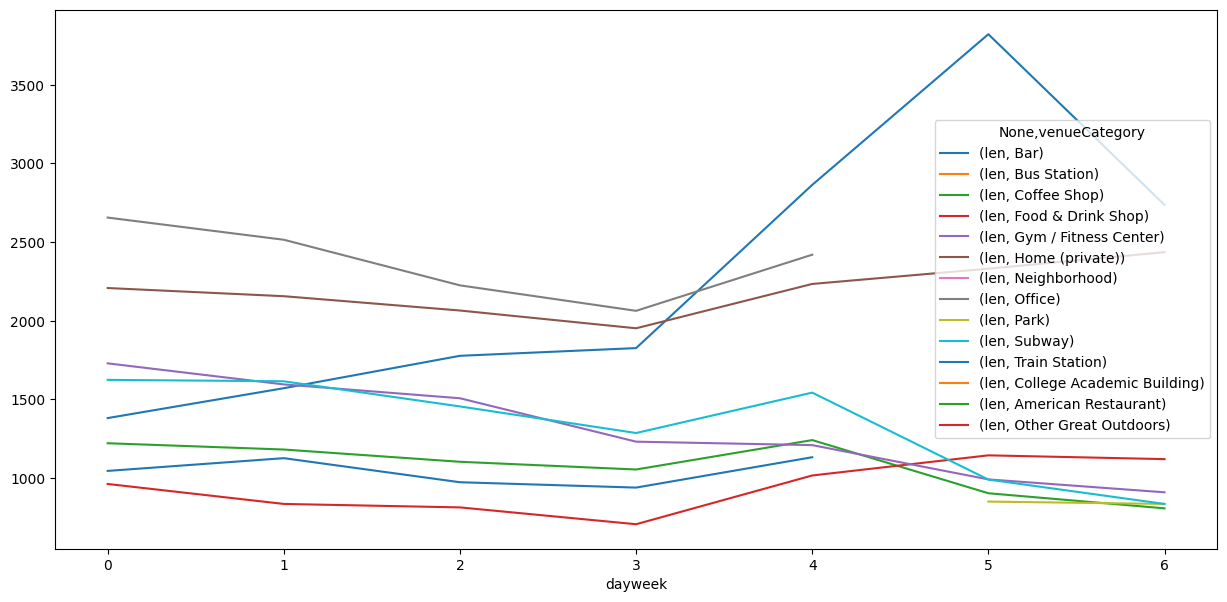

In [6]:
fig, ax = plt.subplots(figsize=(15,7))
pru= nyc_data.groupby([ 'dayweek','venueCategory']).venueId.agg([len])
pru2 =pru.query('len > 700')
pru2.unstack().plot(ax=ax)

Top 10 popular venue categories

Text(0, 0.5, 'Check-ins per Venue Category')

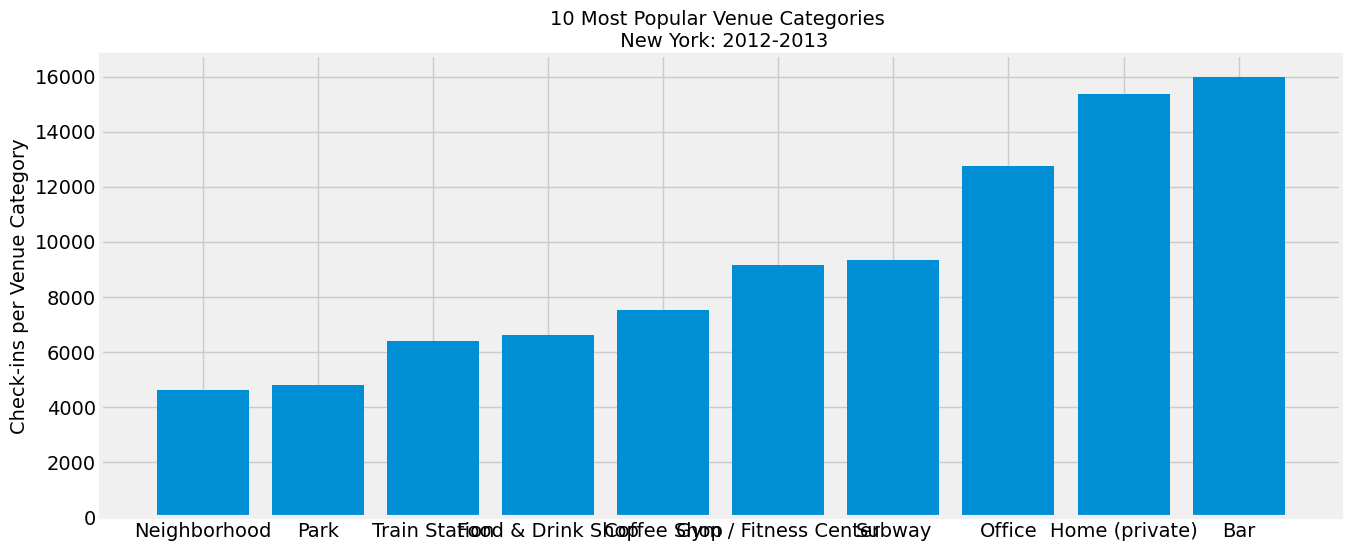

In [7]:
NYC = pd.read_csv('dataset_TSMC2014_NYC.csv')

NYC=NYC[["venueCategory","venueCategoryId"]]
grouped=NYC.groupby(["venueCategory"]).count()
grouped=grouped.sort_values('venueCategoryId')
grouped=grouped[241:251]

#Plot bars of most popular venue categories
plt.figure(figsize=(16,6))
plt.style.use('fivethirtyeight')
plt.bar(grouped.index,grouped["venueCategoryId"])
plt.title("10 Most Popular Venue Categories \n New York: 2012-2013",fontsize=14,color='black')
plt.ylabel("Check-ins per Venue Category",fontsize=14)

Heatmaps of chackings in New York

Text(0, 0.5, 'Latitude')

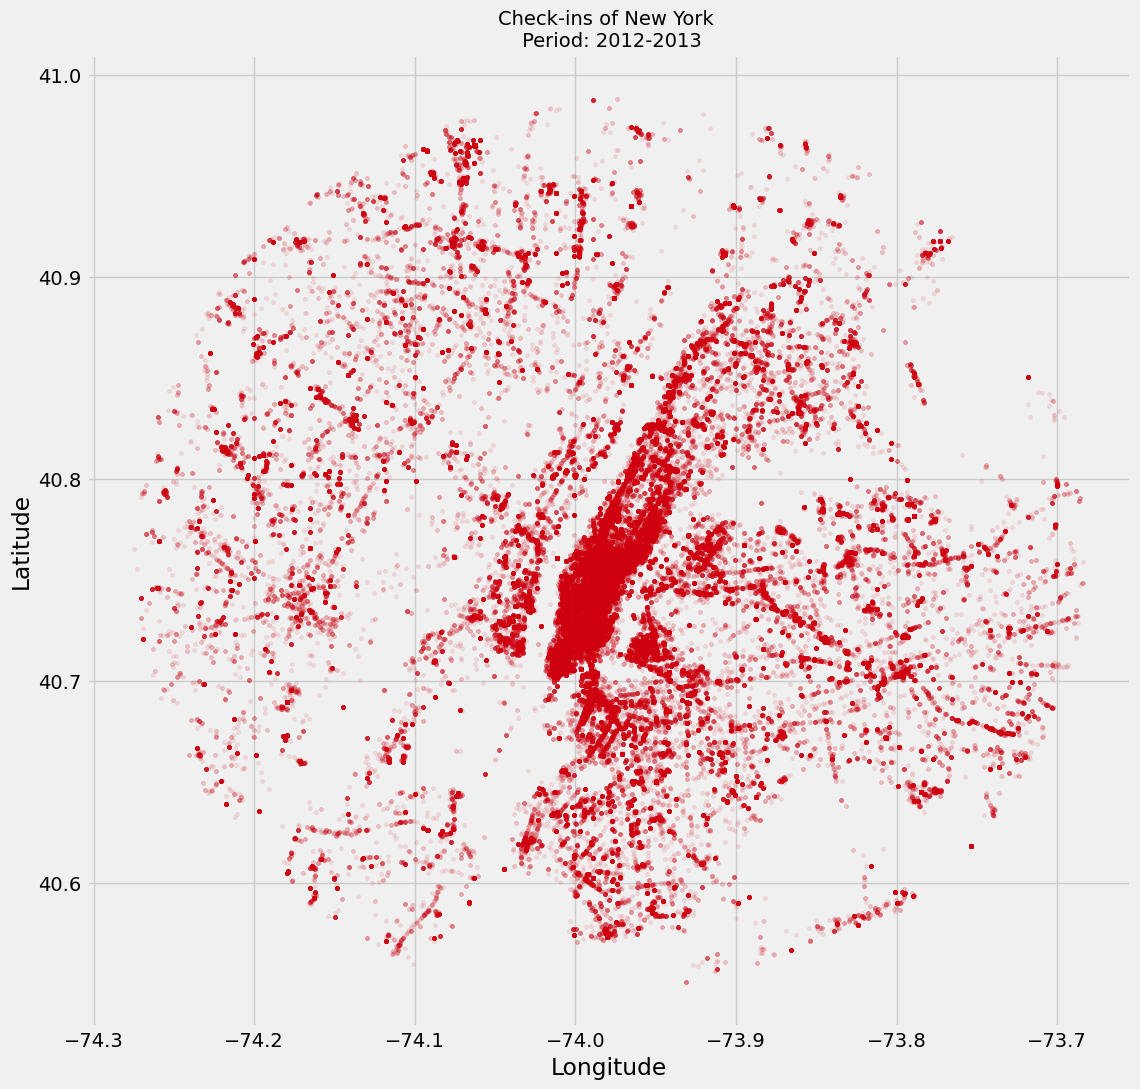

In [8]:
NYC = pd.read_csv('dataset_TSMC2014_NYC.csv')

#Get GPS Coordinates
x1 = NYC['longitude'].values
y1 = NYC['latitude'].values

#Plot scatter, where x-axis is latitude and y-axis is longitude
plt.figure(figsize=(12,12))
ax1 = plt.subplot()
ax1.scatter(x1,y1,s=8, alpha=0.1, c='#CF000F')

#Set title and labels for axises
ax1.set_title("Check-ins of New York \n Period: 2012-2013",fontsize=14,color='black')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

In [9]:
group= nyc_data.groupby([ 'userId','venueCategory']).venueCategoryId.agg([len])
group.head()
#group_1 = group.groupby('userId').sum()
#group_1.head()
group.to_csv('grouped.csv')
#df.to_csv('grouped.csv')

Users with most checkings along with categories 

<AxesSubplot:xlabel='userId'>

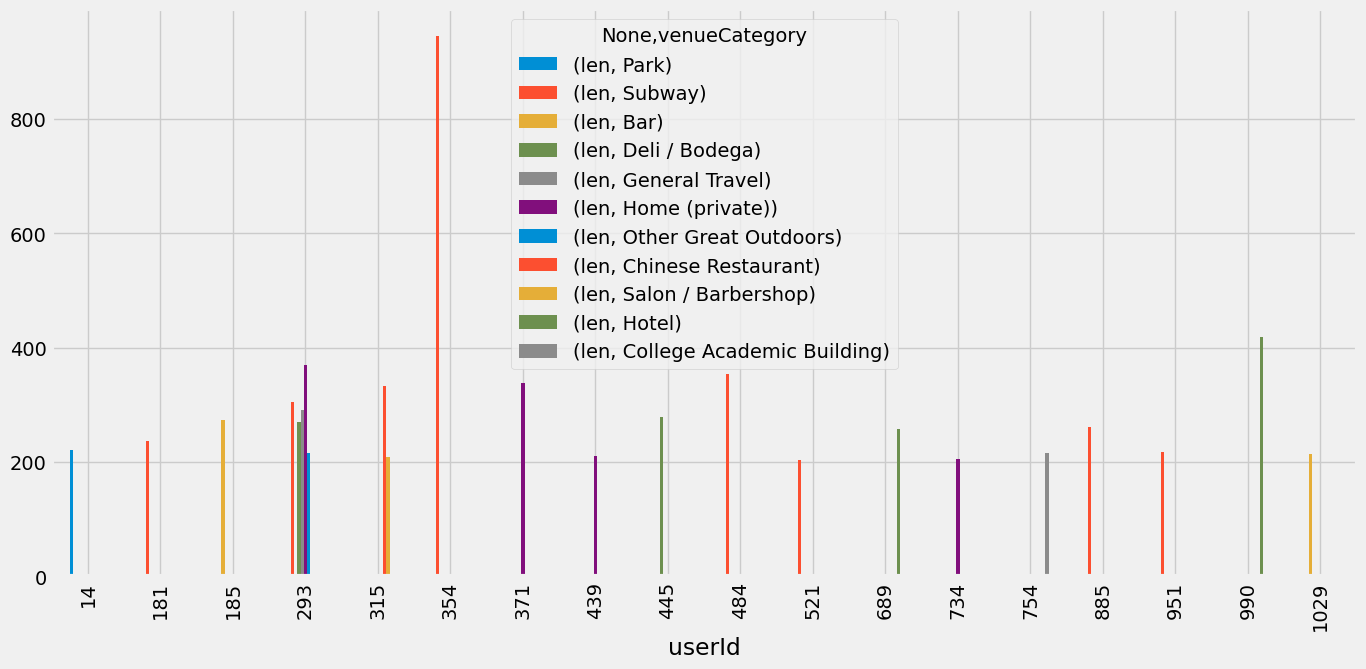

In [10]:
dt = pd.read_csv('grouped.csv')
dt1 = dt[:400]
#d =dt1.query('venueCategory > 2')
#fig, ax = plt.figure(figsize=(16,10))
fig, ax = plt.subplots(figsize=(15,7))
#sns.barplot(data= dt1, x= 'userId', y = 'len', hue = 'venueCategory', dodge= False)
d= nyc_data.groupby([ 'userId','venueCategory']).venueId.agg([len])
d2 =d.query('len > 200')
d2.unstack().plot.bar(ax=ax)


# Methods
## Data proprocessing 

There are some attributes in the dataset that does not have any relation to the label. Those attibutes were discarded in order to train machine learning models on the dataset. The dataset will look like this. 



In [11]:
selected_features = ['latitude', 'longitude', 'timezoneOffset']
data, labels = nyc_data[selected_features], nyc_data['venueCategory']
#labels.value_counts()
data.head()

,latitude,longitude,timezoneOffset
0,40.719810,-74.002581,-240
1,40.606800,-74.044170,-240
2,40.716162,-73.883070,-240
3,40.745164,-73.982519,-240
4,40.740104,-73.989658,-240


In [12]:
data.shape

(227428, 3)

The data was split into 70% for training and 20 % for testing.

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_test.shape, y_train.shape

((181942, 3), (45486, 3), (45486,), (181942,))

### Models 
Classification task was performed on this dataset. Testing data contains location of the users and the model will predict which place the user is likely to go. Not all machine learning models are computationally efficient on large datasets. I started experimented on models such as stochastic gradien descent and support vector machines but even after 30 minutes I was not able to see the results. I noticed that a few algorithms are computationally efficient. Three models were used to perform this experiment. Logistic regression, random forest and multi latyer perceptron. 
Logistic regression calculates probability of an event using log-odds and linea combination of samples. Random forest is ensemble based apparoch where the model has multiple tree based models and outputs the results of the best performed model. Multilayer perceptron is a simple neural network that takes input data and propagates into hidden layer that has approxmation fucntions. The output of hidden layers goes into activation function which generates precise prediction value. In this experiment, MLP has 50 iterations.

### Evaluation 
I used test accuracy to measure the performance of the model. I also used classification report function of scikit learn library which has multiple metrices that gives more detailed observation of model performance. For visualization I used confusion matrix of top 5 predictions of the vanues because it is not possible visualize the results of 251 classes. 

### Discussion 

Random Forest classifier has the best performence after observing all the metrices and visualization. The decision tree based models are proved to perform better on tabular data. Also, the ensemble models garners better performances on any kind of datasets.One of the reason that multilayer perceptron did not perform well is the number of iterations were less. Because of the time and resource contraints I was not able to experiment with more number of iterations.  Therefore, random forest classfier performs better than all other algorithms. The confusion matrices are of logistic regression, random forest and multilayer perceptron respectively. 

processing: Logistic Regression


/home/oshar002/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Confusion Matrix of:Logistic Regression
Classification report of Logistic Regression


/home/oshar002/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/oshar002/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/oshar002/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                      precision    recall  f1-score   support

                 Bar       0.08      0.29      0.13      3262
      Home (private)       0.00      0.00      0.00      1836
              Office       0.07      0.77      0.13      3053
              Subway       0.00      0.00      0.00      2499
Gym / Fitness Center       0.00      0.00      0.00      1904
              _other       0.99      0.00      0.01     32932

            accuracy                           0.08     45486
           macro avg       0.19      0.18      0.04     45486
        weighted avg       0.73      0.08      0.02     45486

processing: Random Forest
Confusion Matrix of:Random Forest
Classification report of Random Forest
                      precision    recall  f1-score   support

                 Bar       0.87      0.90      0.89      3262
      Home (private)       0.92      0.97      0.94      1836
              Office       0.97      0.99      0.98      3053
              Subway       0.

/home/oshar002/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Confusion Matrix of:Multi Layer Perceptron
Classification report of Multi Layer Perceptron


/home/oshar002/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/oshar002/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                      precision    recall  f1-score   support

                 Bar       0.08      0.29      0.13      3262
      Home (private)       0.00      0.00      0.00      1836
              Office       0.07      0.77      0.13      3053
              Subway       0.00      0.00      0.00      2499
Gym / Fitness Center       0.00      0.00      0.00      1904
              _other       0.99      0.00      0.01     32932

            accuracy                           0.08     45486
           macro avg       0.19      0.18      0.04     45486
        weighted avg       0.73      0.08      0.02     45486



/home/oshar002/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,model,training accuracy,test accuracy
0,Logistic Regression,0.072446,0.074902
1,Random Forest,0.995641,0.880117
2,Multi Layer Perceptron,0.072446,0.074902


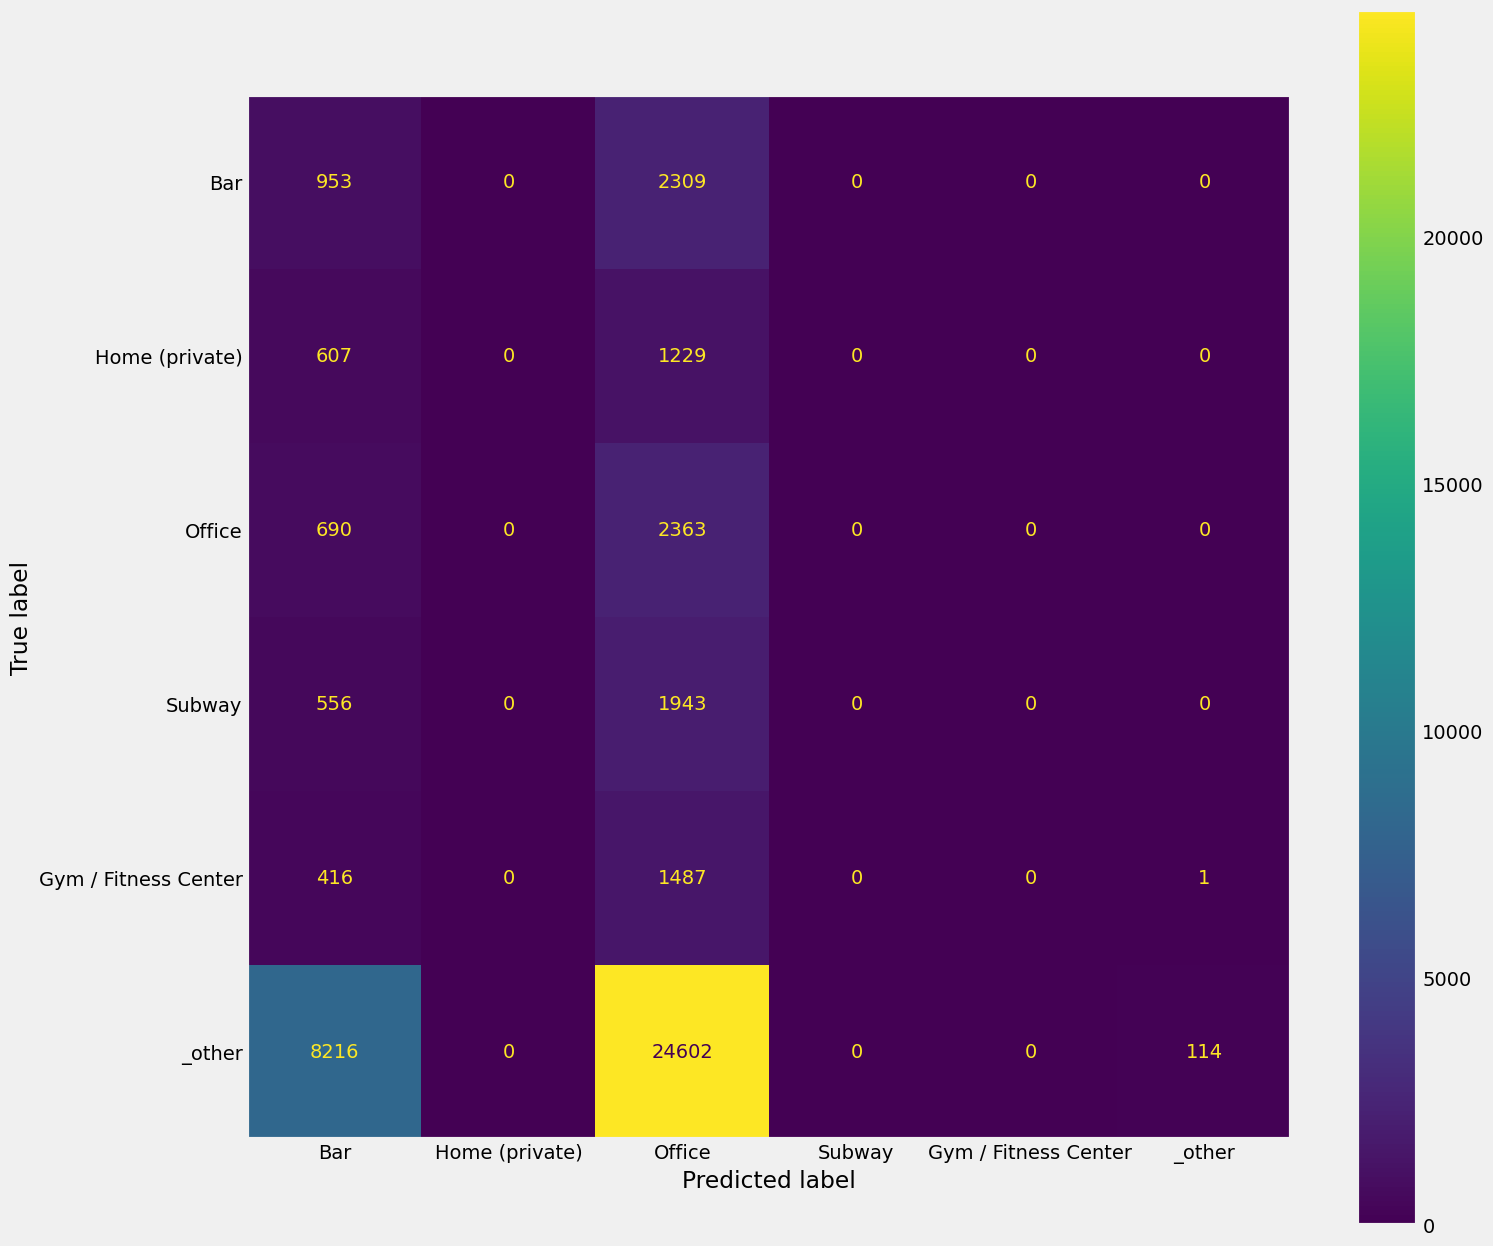

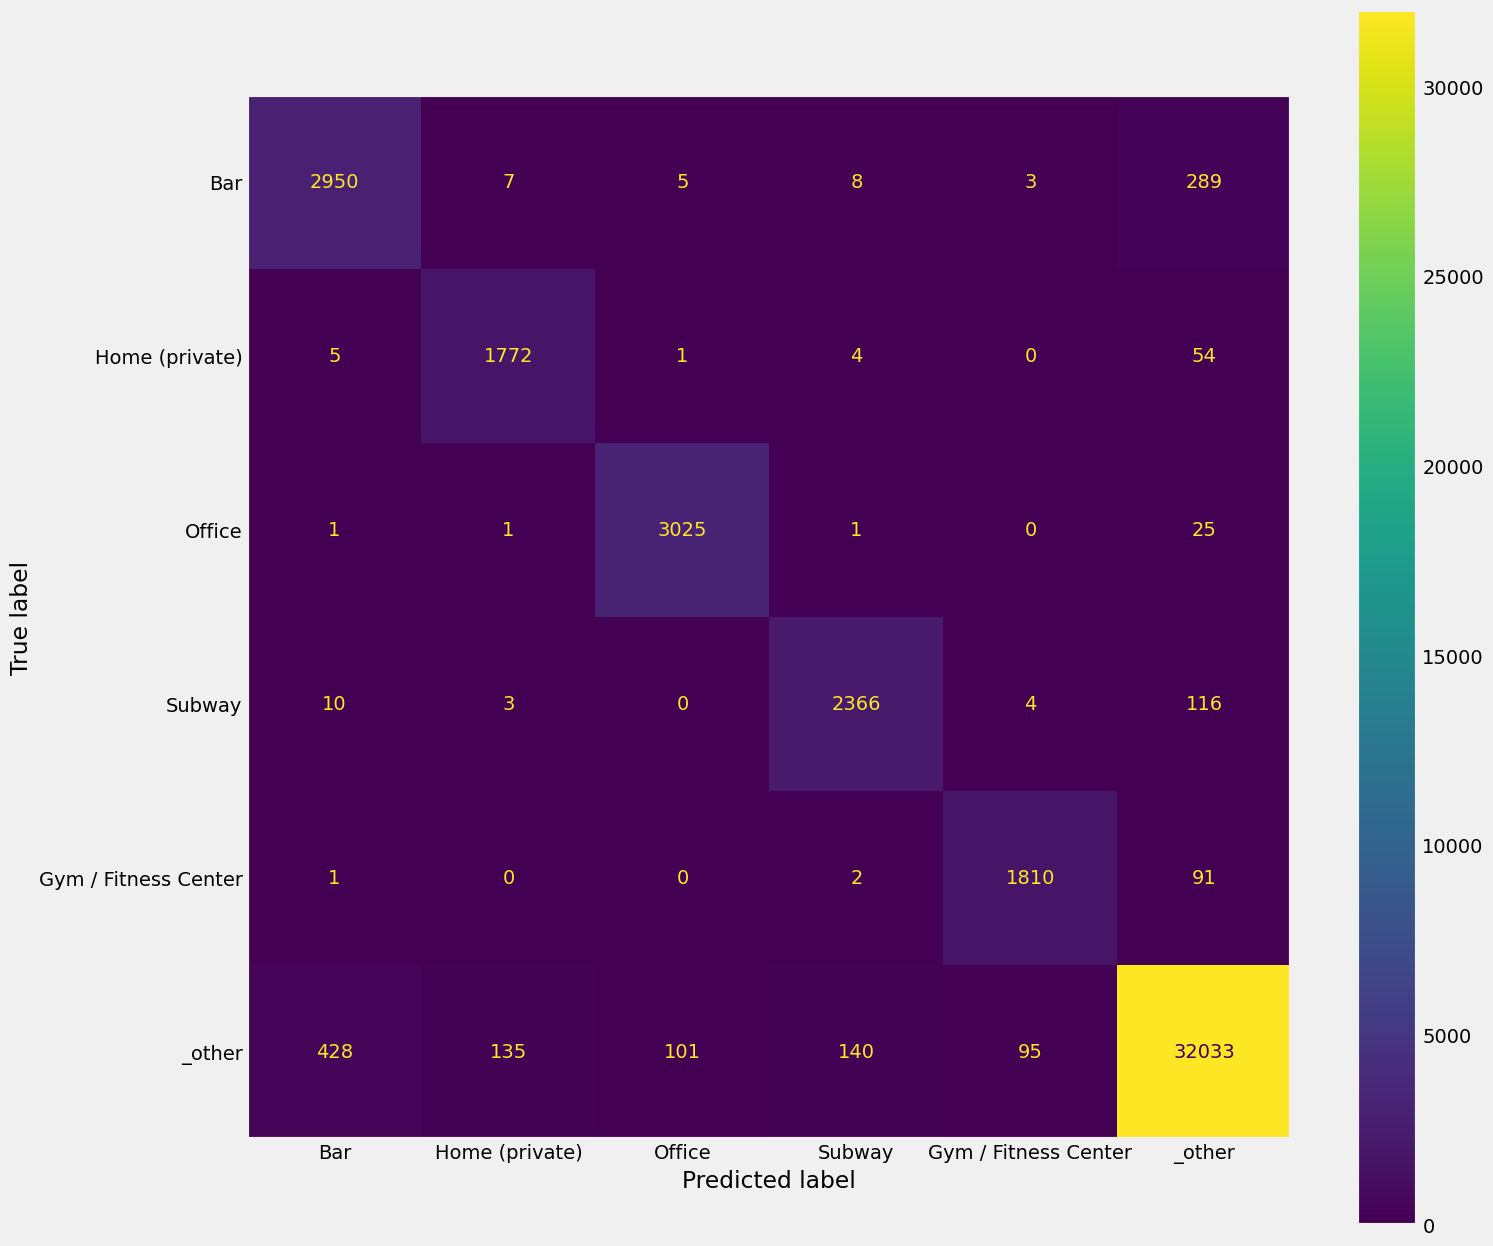

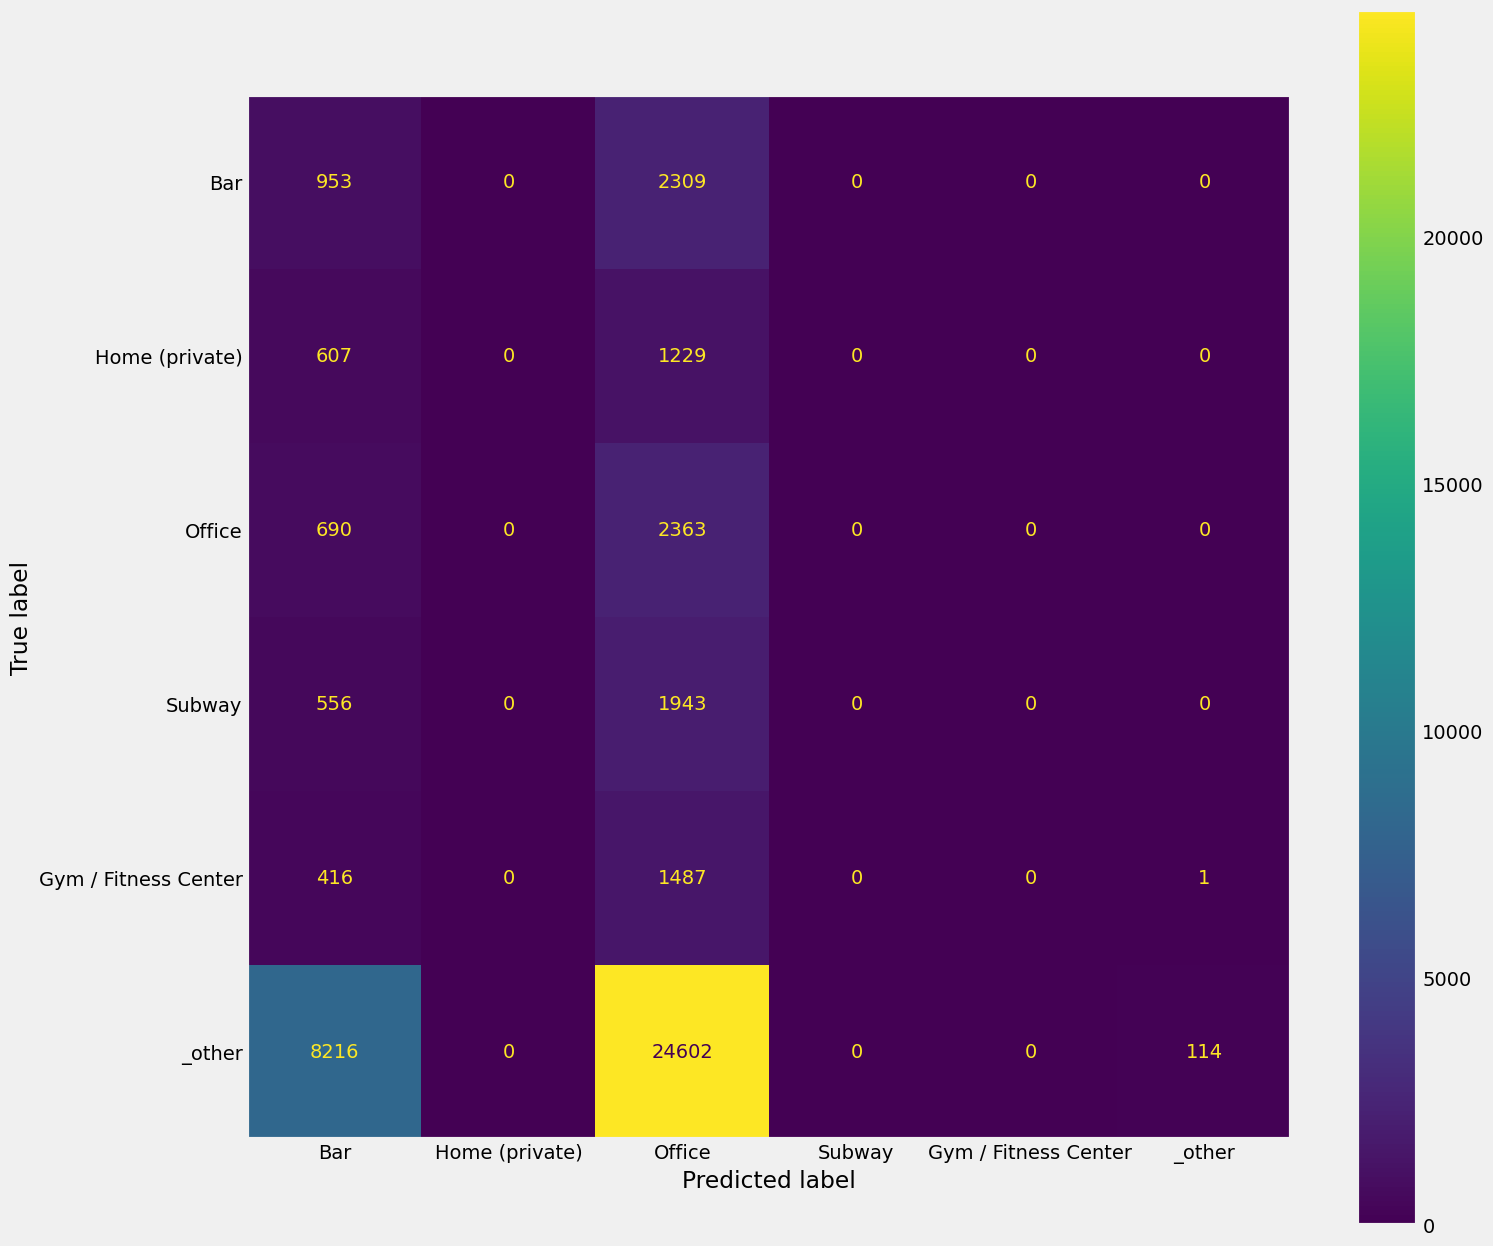

In [38]:
def final_eval(model, X, y):
    clf = model.fit(X_train, y_train)
    y_train_acc = clf.score(X_train, y_train)
    y_test_acc = clf.score(X, y)
    y_pred = clf.predict(X)
    return y_train_acc, y_test_acc, y_pred



models = {

    'Logistic Regression': LogisticRegression(penalty='l2'),
    'Random Forest': RandomForestClassifier(),
    'Multi Layer Perceptron': MLPClassifier(hidden_layer_sizes=(5, 5,4), activation='relu', alpha=0.001, max_iter=50),
}

cols = ['model', 'training accuracy', 'test accuracy']
results = pd.DataFrame(np.zeros((len(models), len(cols))), columns=cols)

for idx, (mk, mv) in enumerate(models.items()):
    print('processing:', mk)

    train_acc, test_acc, y_pred = final_eval(mv, X_test, y_test)
    results.iloc[idx, 0] = mk
    results.iloc[idx, 1] = train_acc
    results.iloc[idx, 2] = test_acc
    top_n = 5
    top_classes = [label[0] for label in Counter(y_test).most_common()[:top_n]] + ["_other"]
    top_y_true = [y if y in top_classes else "_other" for y in y_test]
    top_y_pred = [y if y in top_classes else "_other" for y in y_pred]
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.grid( False)
    title = print('Confusion Matrix of:' + mk)
    #print(top_y_pred, top_y_true)
    cm = confusion_matrix(top_y_true, top_y_pred)
    cm_display = ConfusionMatrixDisplay(cm, display_labels=top_classes)
   
    cm_display.plot(ax = ax)
    cm_display.ax_.set_title(title)

    print("Classification report of " + mk)
    print(classification_report(top_y_true, top_y_pred, target_names=top_classes))
# output_table
results

### Future work 
This is timeseries dataset. Which means this dataset has temporal properties. The future work would to analyse temporal relation ships in the data. And to propose a model that can recognize the temporal patterns and extract meaningful features from the data. 